In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle
import math
from sklearn.utils import shuffle
import time
from sklearn.model_selection import train_test_split

In [2]:
pickle_in=open("DogCatX.pickle",'rb')
DogCatX=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open('DogCaty.pickle','rb')
DogCaty=pickle.load(pickle_in)
pickle_in.close()

In [3]:
DogCatX=np.reshape(DogCatX,(24946,2500))
DogCatX,DogCaty=shuffle(DogCatX,DogCaty,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(DogCatX,DogCaty,random_state=5,test_size=0.25)

In [11]:
train_size=list(range(2,11,2))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
learn_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=0)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()        
    knn=KNeighborsClassifier(n_neighbors=int(math.sqrt(len(X_train_sub)/2)))
    knn.fit(X_train_sub,y_train_sub)
    errorate_train.append(1-accuracy_score(y_train_sub,knn.predict(X_train_sub)))
    errorate_test.append(1-accuracy_score(y_test,knn.predict(X_test)))
    learn_time.append(time.clock()-time_start)


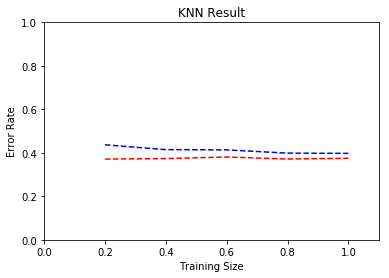

In [12]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('KNN Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_KNN_Error.png')

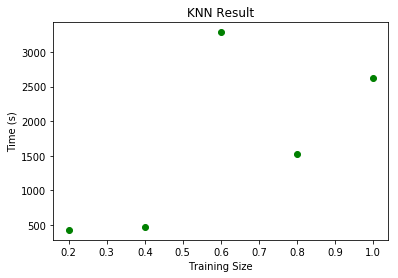

In [20]:
plt.plot(train_size,learn_time,'go')
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('KNN Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_KNN_T.png')

In [18]:
learn_time

[426.53125525925134,
 467.6460529050091,
 3287.5448181020183,
 1531.4913730506669,
 2618.1682426970947]

In [19]:
errorate_test

[0.43706910373577035,
 0.41462241462241467,
 0.4135000801667469,
 0.3985890652557319,
 0.3974667308000641]